<h1 style="color: #5e9ca0; text-align: center;">Química Analítica</h1>
<h2 style="color: #2e6c80; text-align: center;">Curvas de Volumetria de Precipitação</h2>
<h3 style="color: #2e6c80; text-align: center;">
$
  NaCl \, com \, AgNO_{3}
$
</h3>

<h2 style="color: #5e9ca0;">1. Objetivo</h2>

<h4>Titula&ccedil;&atilde;o de 50,00 mL de solu&ccedil;&atilde;o de NaCl 0,100 mol/L com solu&ccedil;&atilde;o padr&atilde;o de AgNO<sub>3</sub> 0,100 mol/L.</h4>

<h2 style="color: #5e9ca0;">2. Importando bibliotecas</h2>

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format

# mostrando todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# mostrando todas as linhas do dataframe
pd.set_option('display.max_rows', None)

<h2 style="color: #5e9ca0;">3. Gerando dados</h2>

In [27]:
# Registra dos dados da titulação volumétrica de precipitação
resultados = []

# Dados
c_NaCl = 0.1
v_NaCl = 0.05 # volume em litros
c_AgNO3 = 0.1
kps_AgCl = 1.56 * (10**(-10))

# Volume de equivalência
v_equivalencia = (c_NaCl * v_NaCl) / c_AgNO3
v_equivalencia = np.around(v_equivalencia, 6) # número de casas decimais

# Gerando dados
for v_AgNO3 in np.arange(0, 0.1205, 0.0005): # volume em Litros
    v_AgNO3 = np.around(v_AgNO3, 6)

    if v_AgNO3 == 0.0:
        # Sem adição de AgNO3. O pAg não é possível de ser determinado.
        pass
    else:
        if v_AgNO3 < v_equivalencia:
            c_ion_Cl = ((c_NaCl * v_NaCl) - (c_AgNO3 * v_AgNO3)) / (v_NaCl + v_AgNO3)
            c_ion_Ag = (kps_AgCl / c_ion_Cl)
            pAg = -np.log10(c_ion_Ag)

            # Adiciona em resultados
            resultados.append([np.around(pAg, 3), v_AgNO3])
        elif v_AgNO3 == v_equivalencia:
            # No ponto de equivalência, a concentracao do Ag+ é igual à concentração do Cl-, portanto,
            # utiliza-se o valor de solubilidade para encontrar o pAg
            solubilidade = np.sqrt(kps_AgCl)
            c_ion_Ag = solubilidade
            pAg = -np.log10(c_ion_Ag)

            # Adiciona em resultados
            resultados.append([np.around(pAg, 3), v_AgNO3])
        else:
            c_ion_Ag = ((c_AgNO3 * v_AgNO3) - (c_NaCl * v_NaCl)) / (v_AgNO3 + v_NaCl)
            pAg = -np.log10(c_ion_Ag)

            # Adiciona em resultados
            resultados.append([np.around(pAg, 3), v_AgNO3])

#
# Dataframe de titulação de precipitação
#
df_dados_titulacao = pd.DataFrame(resultados, columns=["pAg", "Volume"])

In [69]:
df_dados_titulacao[df_dados_titulacao["Volume"] == 0.05].iloc[0]["pAg"]


4.903

<h2 style="color: #5e9ca0;">4. Gráfico</h2>

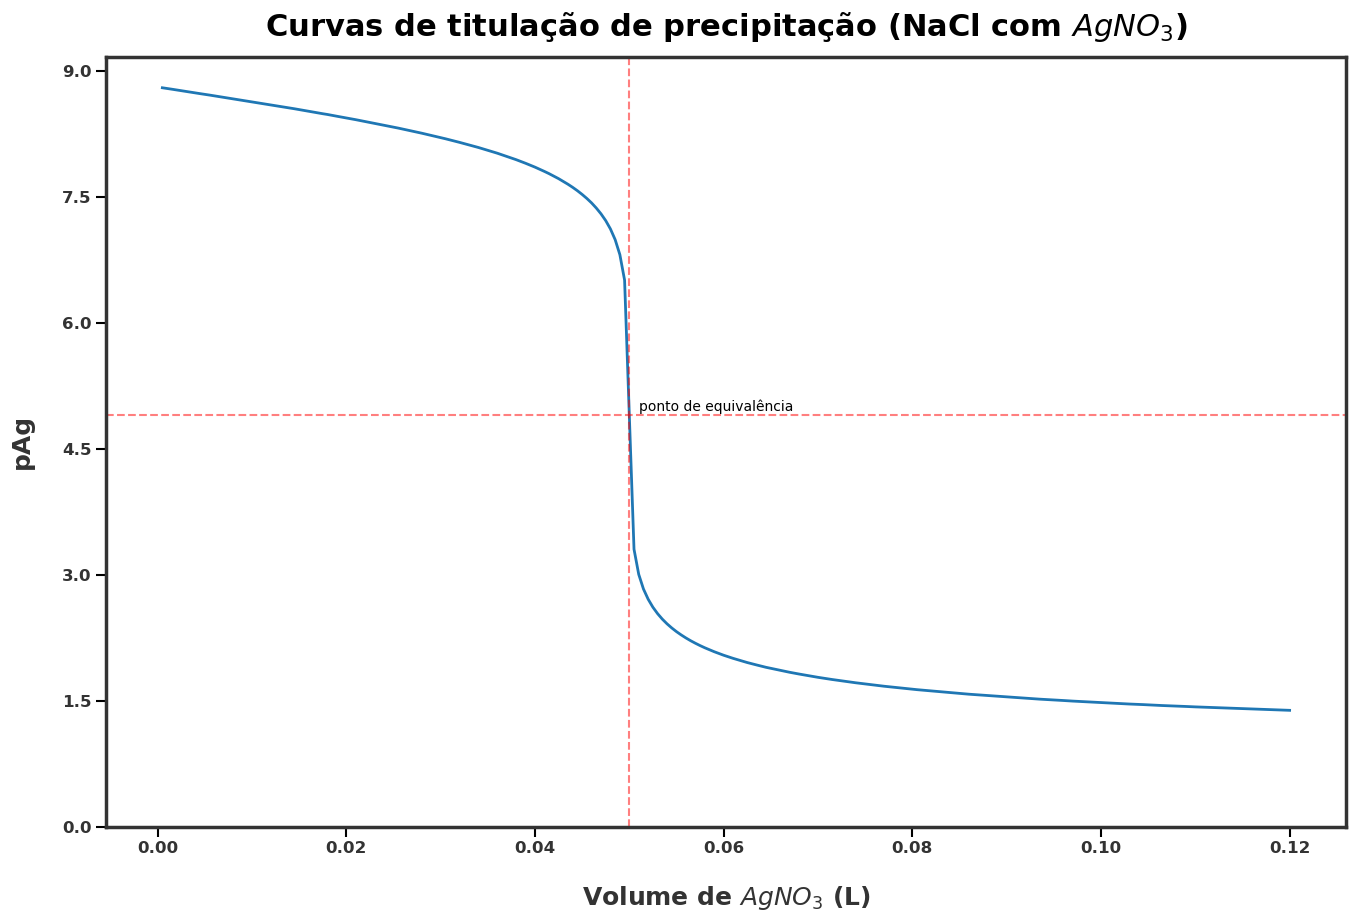

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

sns.lineplot(data = df_dados_titulacao,
             x = "Volume",
             y = "pAg",
             linewidth = 2)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
#ax.xaxis.set_ticks(np.arange(0, 0.1205, 0.0005))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(0, 10.0, 1.5))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 12, weight = 'bold', color = '0.2')

# definição geral dos ticks do eixo x
plt.xticks(size = 12, weight = 'bold', color = '0.2')


ax.set_ylabel('pAg', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de $AgNO_{3}$ (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação de precipitação (NaCl com $AgNO_{3}$)", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

# Desenhando linha no valor de pAg no ponto de equivalência
pAg_ponto_eq = df_dados_titulacao[df_dados_titulacao["Volume"] == 0.05].iloc[0]["pAg"]
plt.axhline(pAg_ponto_eq, color='r', ls="--", alpha=0.5)
plt.axvline(v_equivalencia, color='r', ls="--", alpha=0.5)
ax.text((v_equivalencia + 0.001), (pAg_ponto_eq + 0.1),
        'ponto de equivalência',
        horizontalalignment='left',
        verticalalignment='center')

# Salvando gráfico
plt.savefig('vol_precip_NaCl_com_AgNO3.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()